In [26]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [27]:
all_df = pd.read_csv("titanic.csv")

In [28]:
cols=['survived','pclass' ,'sex', 'age',
       'fare',]
df=all_df[cols]
df.isnull().sum()
df=df.values

In [29]:
X = df[:,1:]
Y = df[:,0]

In [30]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 

In [31]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [32]:
model = Sequential()

In [33]:
model.add(Dense(units=12*9,input_dim=4,
                kernel_initializer='uniform', 
                activation='relu'))

In [34]:
model.add(Dense(units=12*8,
                kernel_initializer='uniform', 
                activation='relu'))

In [35]:
model.add(Dense(units=12*7,
                kernel_initializer='uniform', 
                activation='relu'))

In [36]:
model.add(Dense(units=12*6,
                kernel_initializer='uniform', 
                activation='relu'))

In [37]:
model.add(Dense(units=12*5,
                kernel_initializer='uniform', 
                activation='relu'))

In [38]:
model.add(Dense(units=12*4,
                kernel_initializer='uniform', 
                activation='relu'))

In [39]:
model.add(Dense(units=12*3,
                kernel_initializer='uniform', 
                activation='relu'))

In [40]:
model.add(Dense(units=12*2,
                kernel_initializer='uniform', 
                activation='relu'))

In [41]:
model.add(Dense(units=12,
                kernel_initializer='uniform', 
                activation='relu'))

In [42]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 108)               540       
_________________________________________________________________
dense_12 (Dense)             (None, 96)                10464     
_________________________________________________________________
dense_13 (Dense)             (None, 84)                8148      
_________________________________________________________________
dense_14 (Dense)             (None, 72)                6120      
_________________________________________________________________
dense_15 (Dense)             (None, 60)                4380      
_________________________________________________________________
dense_16 (Dense)             (None, 48)                2928      
_________________________________________________________________
dense_17 (Dense)             (None, 36)                1764      
__________

In [44]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [45]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2,callbacks=[early_stopping])

Train on 941 samples, validate on 105 samples
Epoch 1/30
 - 3s - loss: 0.6921 - acc: 0.5866 - val_loss: 0.6897 - val_acc: 0.6571
Epoch 2/30
 - 0s - loss: 0.6898 - acc: 0.6057 - val_loss: 0.6861 - val_acc: 0.6571
Epoch 3/30
 - 0s - loss: 0.6875 - acc: 0.6057 - val_loss: 0.6829 - val_acc: 0.6571
Epoch 4/30
 - 0s - loss: 0.6855 - acc: 0.6057 - val_loss: 0.6800 - val_acc: 0.6571
Epoch 5/30
 - 0s - loss: 0.6838 - acc: 0.6057 - val_loss: 0.6772 - val_acc: 0.6571
Epoch 6/30
 - 0s - loss: 0.6823 - acc: 0.6057 - val_loss: 0.6749 - val_acc: 0.6571
Epoch 7/30
 - 0s - loss: 0.6810 - acc: 0.6057 - val_loss: 0.6724 - val_acc: 0.6571
Epoch 8/30
 - 0s - loss: 0.6797 - acc: 0.6057 - val_loss: 0.6705 - val_acc: 0.6571
Epoch 9/30
 - 0s - loss: 0.6786 - acc: 0.6057 - val_loss: 0.6689 - val_acc: 0.6571
Epoch 10/30
 - 0s - loss: 0.6776 - acc: 0.6057 - val_loss: 0.6671 - val_acc: 0.6571
Epoch 11/30
 - 0s - loss: 0.6768 - acc: 0.6057 - val_loss: 0.6654 - val_acc: 0.6571
Epoch 12/30
 - 0s - loss: 0.6760 - acc:

In [46]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

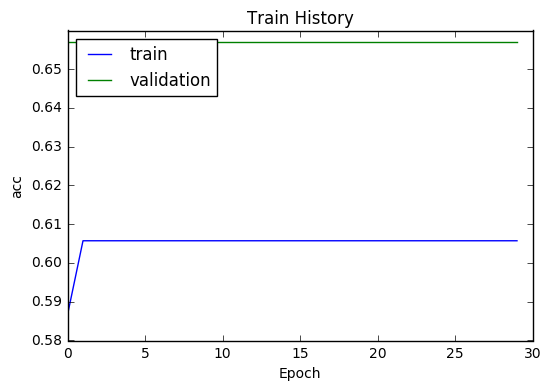

In [47]:
show_train_history(train_history,'acc','val_acc')

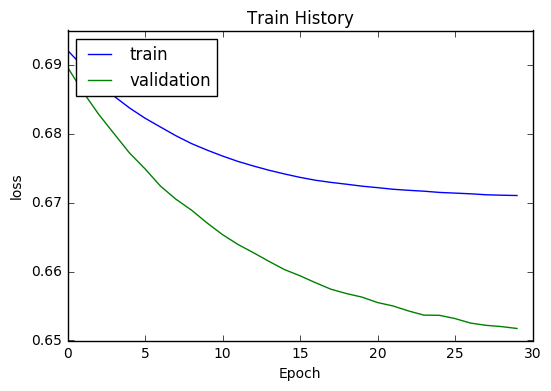

In [48]:
show_train_history(train_history,'loss','val_loss')

In [49]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

262/262 [==============================] - 0s 91us/step


In [50]:
scores[1]

0.6450381683939286